# 範例

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [5]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../1st-DL-CVMarathon/data/lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Affine Transformation - Case 1: rotation 45 > scale 0..5 > shift (x+100, y-50)

original image shape: row:512, col:512
Rotation Matrix
[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]

Translation Matrix
[[  1.   0. 100.]
 [  0.   1. -50.]]


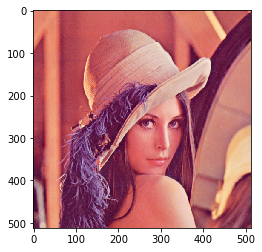

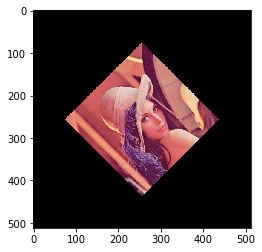

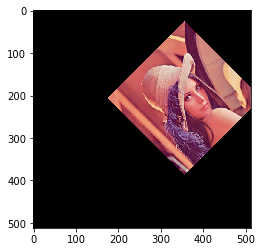

In [6]:
rows, cols = img.shape[:2]
print('original image shape: row:{}, col:{}'.format(rows, cols))

# 取得旋轉矩陣
# getRotationMatrix2D(center, angle, scale)
M_rotate = cv2.getRotationMatrix2D((cols//2, rows//2), 45, 0.5)
print('Rotation Matrix')
print(M_rotate)
print()

# 取得平移矩陣
M_translate = np.array([[1, 0, 100], [0, 1, -50]], dtype=np.float32)
print('Translation Matrix')
print(M_translate)

# 旋轉
img_rotate = cv2.warpAffine(img, M_rotate, (cols, rows))

# 平移
img_rotate_trans = cv2.warpAffine(img_rotate, M_translate, (cols, rows))

# 組合 + 顯示圖片
img_show_rotate_trans = [img, img_rotate, img_rotate_trans]
for i in range(len(img_show_rotate_trans)):
    plt.imshow(img_show_rotate_trans[i])
    plt.show()
# while True:
#     cv2.imshow('Rotate 45, scale 0.5, Translate x+100, y-50', img_show_rotate_trans)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break